In [1]:
import os
from os.path import join, pardir, curdir
import glob
import numpy as np
import pandas as pd
import scipy as sp
from tqdm import tqdm
from matplotlib import pyplot as plt
from joblib import load, dump
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, precision_score, classification_report

# Set current directory to "src"
os.chdir(join(os.getcwd(), os.pardir, "src"))
print(f"Current working directory: {os.getcwd()}")

from feature_extractor import *
from process import *

Current working directory: /home/fa926284/Documents/Parkinson_FOG_Detection/src


In [2]:
DATASETS = ['tdcsfog', 'defog']
DATA_PATH = join(pardir, 'data')
PROCESSED_DATA_PATH = join(pardir, "data", "processed")
RANDOM_SEED = 42

In [3]:
X_train_df = load(join(PROCESSED_DATA_PATH, "X_train_df.joblib"))
X_train = load(join(PROCESSED_DATA_PATH, "X_train.joblib"))
y_train = load(join(PROCESSED_DATA_PATH, "y_train.joblib"))

y_train = y_train[~np.isnan(X_train).any(axis=1)]
X_train = X_train[~np.isnan(X_train).any(axis=1)]

X_val_df = load(join(PROCESSED_DATA_PATH, "X_val_df.joblib"))
X_val = load(join(PROCESSED_DATA_PATH, "X_val.joblib"))
y_val = load(join(PROCESSED_DATA_PATH, "y_val.joblib"))

y_val = y_val[~np.isnan(X_val).any(axis=1)]
X_val = X_val[~np.isnan(X_val).any(axis=1)]


In [4]:
# Train Random Forest

model = RandomForestClassifier(n_estimators=10, verbose=3)
model.fit(X_train, y_train)

dump(model, join(pardir, "models", "model_rf.sav"))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.2min remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 16.3min finished


RandomForestClassifier(n_estimators=10, verbose=3)

In [7]:
model = load(join(pardir, "models", "model_rf.sav"))


In [32]:
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

y_val_b = label_binarize(y_val, classes=[0, 1, 2, 3])
y_pred_b = label_binarize(y_pred, classes=[0, 1, 2, 3])
print(average_precision_score(y_val_b, y_pred_b))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


              precision    recall  f1-score   support

           0       0.81      0.94      0.87    108929
           1       0.01      0.01      0.01      1113
           2       0.73      0.46      0.57     42978
           3       0.00      0.00      0.00       821

    accuracy                           0.79    153841
   macro avg       0.39      0.35      0.36    153841
weighted avg       0.78      0.79      0.77    153841

0.3270387199697216


In [75]:
y_val_b[:y_pred_b.shape[0]].shape, y_pred_b.shape


((153792, 4), (153792, 4))

In [79]:
y_pred_s = RunningMedian(y_pred, 500)

y_val_b = label_binarize(y_val, classes=[0, 1, 2, 3])
y_pred_b = label_binarize(y_pred_s, classes=[0, 1, 2, 3])
print(average_precision_score(y_val_b[:y_pred_b.shape[0]], y_pred_b))


0.3559620415012375


In [62]:
def RunningMedian(x,N):
    x_new = np.zeros(x.size-N+1,)
    for i in range(x_new.size):
        x_new[i] = np.median(x[i:i+N])
    
    x_new = x_new.astype(int)

    return x_new


y_pred_s = RunningMedian(y_pred, 50)


[]

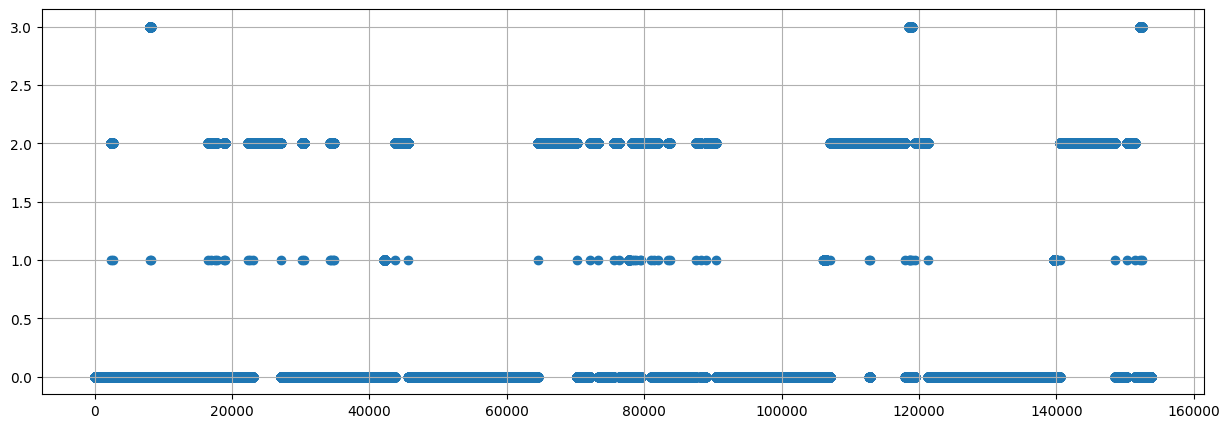

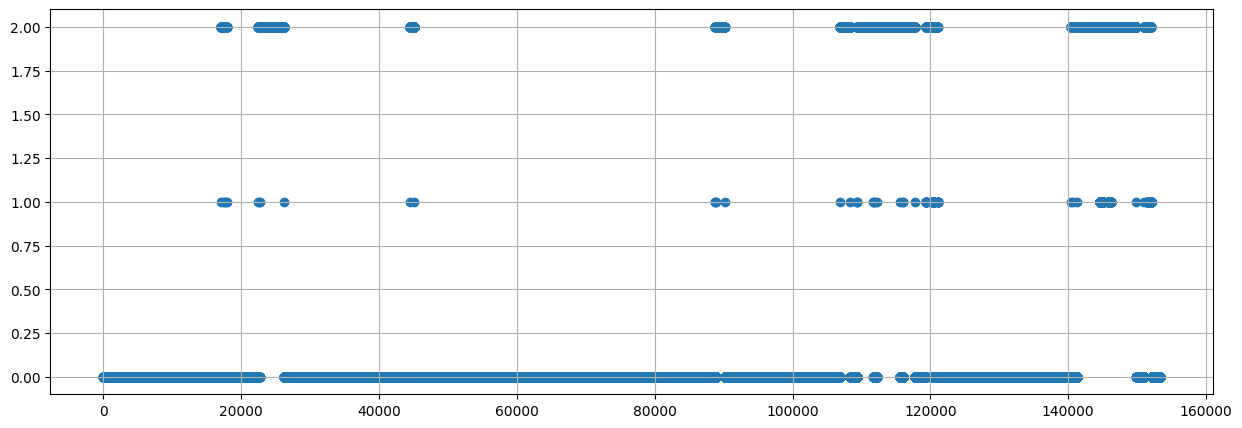

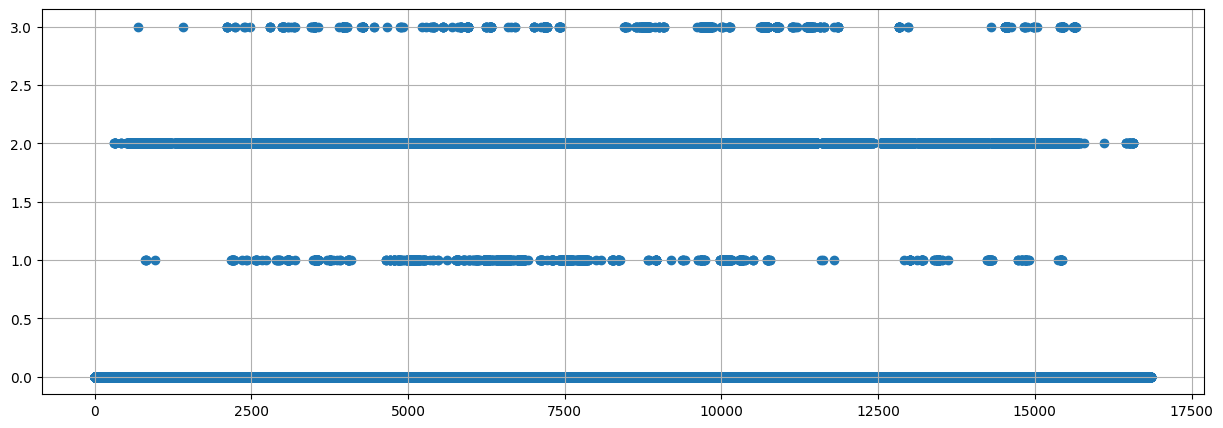

: 

In [80]:
plt.figure(figsize=(15, 5))

plt.scatter(np.arange(y_val.size), y_val[:])
plt.grid()
plt.plot()

plt.figure(figsize=(15, 5))
plt.scatter(np.arange(y_pred_s.size), y_pred_s[:])
plt.grid()
plt.plot()

plt.figure(figsize=(15, 5))
plt.scatter(X_val_df.index[:], y_pred[:])
plt.grid()
plt.plot()
